In [1]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

# Data Preparation for Roof Material Classification

This notebook demonstrates how a dataset for roof material classification is prepared.

In [2]:
from pathlib import Path
import rasterio
import numpy as np
import matplotlib.pyplot as plt

The objective is to train a model that can accurately predict the roof material of a building. The model will classify the roof material into one of four categories: metal sheet, plastic, thatch, or other. The input to this model is a 3-channel RGB image along with a binary mask. This mask indicates the specific building in the image for which the roof material should be predicted. The resulting chips will be 256 by 256 pixels and 4 channels.

We use another `sample_chips.py` script to generate these chips:

```bash
cd scripts/roof_material_classification
python sample_chips.py --config ../../config/examples/roof_material_classification/sample_chips.yml --root-dir $PROJECT_ROOT
```

The chips are organized in subdirectories named after each class. Let's plot some of the generated chips:

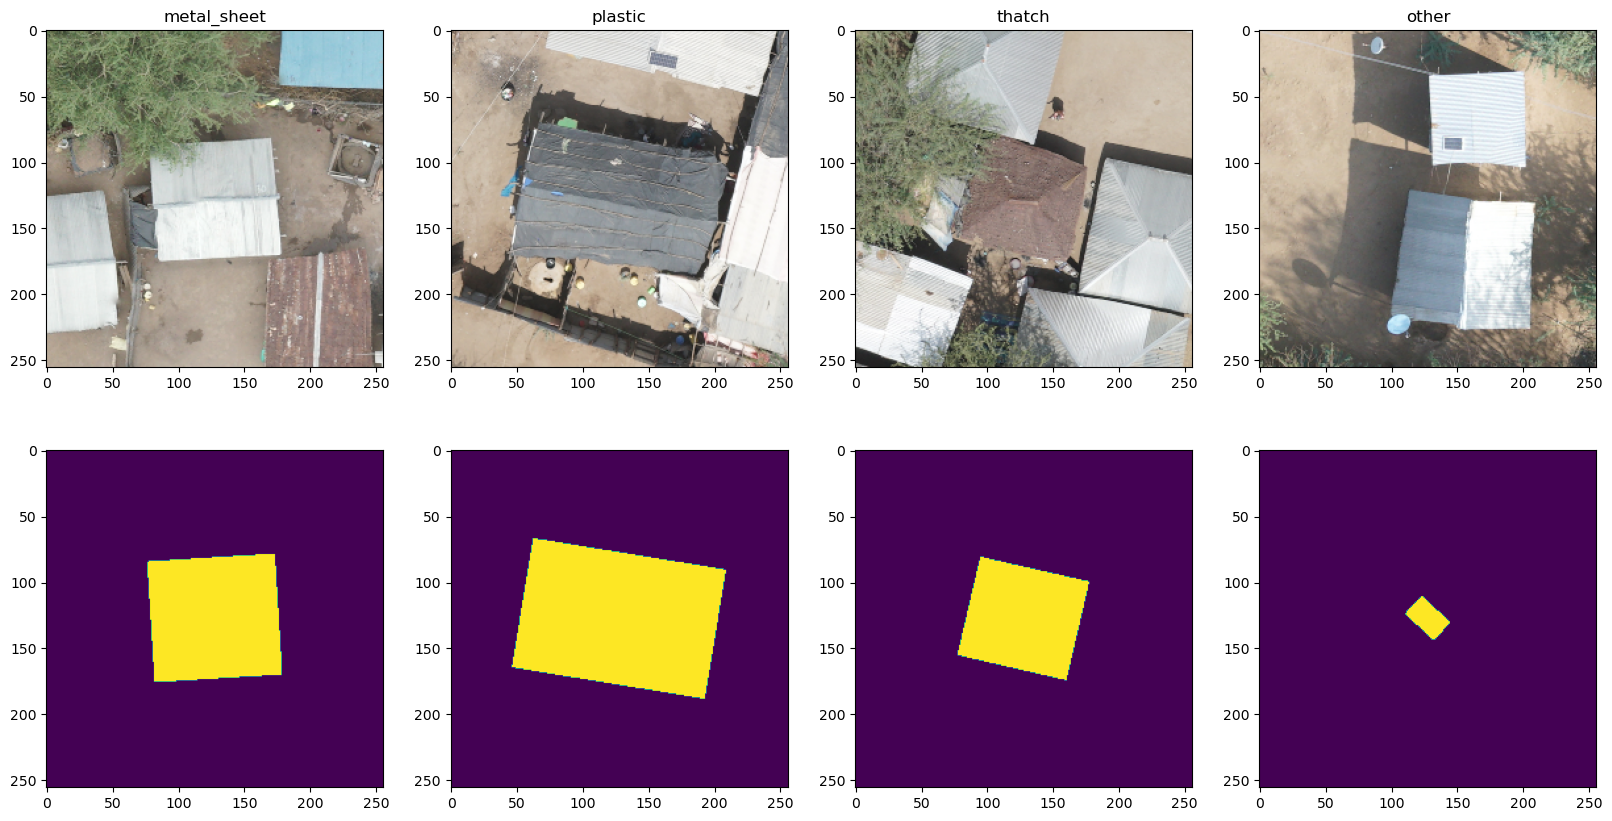

In [3]:
classes = [f.name for f in Path('../data/processed/example_chipped_datasets/roof_material_classification').iterdir()]
fig, axes = plt.subplots(2, len(classes), figsize=(20, 10))
for c in classes:
    # # Get first example of each class
    img = next(Path('../data/processed/example_chipped_datasets/roof_material_classification').joinpath(c).iterdir())
    with rasterio.open(img) as src:
        data = src.read()
        img = data[:3] # image is first 3 bands
        mask = data[3] # mask is 4th band
        axes[0, classes.index(c)].imshow(img.transpose(1, 2, 0))
        axes[0, classes.index(c)].set_title(c)
        axes[1, classes.index(c)].imshow(mask)
plt.show()

